In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://query.data.world/s/wh6j7rxy2hvrn4ml75ci62apk5hgae', low_memory=False)
df.describe()

,year,country_code,crop_land,grazing_land,fishing_ground,built_up_land,carbon,total
count,72186.000000,72186.000000,5.171400e+04,5.171400e+04,5.171300e+04,5.171300e+04,5.171300e+04,7.217700e+04
mean,1990.263154,155.618915,1.920772e+07,1.352875e+07,1.004860e+07,1.984737e+06,3.072609e+07,7.792960e+07
std,16.018761,390.261979,1.685819e+08,1.294180e+08,1.081375e+08,1.730488e+07,3.989630e+08,7.455443e+08
min,1961.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.876963e-02
25%,1977.000000,59.000000,3.581080e-01,1.948302e-01,8.005409e-02,3.786298e-02,0.000000e+00,1.894023e+00
50%,1991.000000,121.000000,3.251810e+00,9.978667e+00,6.154094e+00,2.044437e-01,0.000000e+00,8.292253e+03
75%,2004.000000,193.000000,3.610817e+06,1.734192e+06,9.450000e+05,3.867180e+05,1.915736e+01,1.532959e+07
max,2016.000000,5001.000000,3.984702e+09,3.417089e+09,2.979605e+09,4.726163e+08,1.257160e+10,2.061182e+10


In [3]:
df.head()

,country,year,country_code,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,QScore
0,Armenia,1992,1,AreaPerCap,0.140292,0.199546,0.097188051,0.036888,0.029320,0.000000,5.032351e-01,3A
1,Armenia,1992,1,AreaTotHA,483000.000000,687000.000000,334600,127000.000000,100943.000800,0.000000,1.732543e+06,3A
2,Armenia,1992,1,BiocapPerCap,0.159804,0.135261,0.084003213,0.013742,0.033398,0.000000,4.262086e-01,3A
3,Armenia,1992,1,BiocapTotGHA,550176.242700,465677.972200,289207.1078,47311.551720,114982.279300,0.000000,1.467355e+06,3A
4,Armenia,1992,1,EFConsPerCap,0.387510,0.189462,1.26E-06,0.004165,0.033398,1.114093,1.728629e+00,3A


In [4]:
df['QScore'].value_counts()

3A    51481
2A    10576
2B    10096
1B       16
1A       16
Name: QScore, dtype: int64

In [5]:
df.isna().sum()

country               0
year                  0
country_code          0
record                0
crop_land         20472
grazing_land      20472
forest_land       20472
fishing_ground    20473
built_up_land     20473
carbon            20473
total                 9
QScore                1
dtype: int64

In [6]:
df = df.dropna()
df.isna().sum()

country           0
year              0
country_code      0
record            0
crop_land         0
grazing_land      0
forest_land       0
fishing_ground    0
built_up_land     0
carbon            0
total             0
QScore            0
dtype: int64

In [7]:
df['QScore'] = df['QScore'].replace(['1A'], '2A')
df['QScore'].value_counts()

3A    51473
2A      240
Name: QScore, dtype: int64

In [8]:
df_2A = df[df.QScore=='2A']
df_3A = df[df.QScore=='3A'].sample(350)
data_df = df_2A.append(df_3A)

In [9]:
import sklearn.utils
data_df = sklearn.utils.shuffle(data_df)
data_df = data_df.reset_index(drop=True)

In [10]:
data_df.QScore.value_counts()

3A    350
2A    240
Name: QScore, dtype: int64

In [11]:
#more processing
data_df = data_df.drop(columns=['country_code', 'country', 'year'])

In [12]:
X = data_df.drop(columns='QScore')
y = data_df['QScore']

In [13]:
#split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
y_train.value_counts()

3A    249
2A    164
Name: QScore, dtype: int64

In [14]:
#
#encode categorical variable
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
X_train.record = encoder.fit_transform(X_train.record)
X_test.record = encoder.transform(X_test.record)

C:\Users\HP\anaconda\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [15]:
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=1)
X_train_balanced, y_balanced = smote.fit_sample(X_train, y_train)

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_train_df = scaler.fit_transform(X_train_balanced.drop(columns=['record']))
normalised_train_df=pd.DataFrame(normalised_train_df, 
 columns=X_train_balanced.drop(columns=[ 'record' ]).columns)
normalised_train_df[ 'record' ]=X_train_balanced[ 'record']

X_test=X_test.reset_index(drop=True)
normalised_test_df=scaler.transform(X_test.drop(columns=['record']))
normalised_test_df=pd.DataFrame(normalised_test_df, columns=X_test.drop(columns=['record']).columns)
normalised_test_df['record']=X_test['record']

In [17]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(normalised_train_df, y_balanced)
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, l1_ratio=None, max_iter=100, multi_class='auto', n_jobs=None, penalty=12, random_state=None, solver='lbfigs', tol=0.0001, verbose=0, warm_start=False)

LogisticRegression(penalty=12, solver='lbfigs')

# Measuring Classification Performance

### Cross Validation and Accuracy

In [18]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(log_reg, normalised_train_df, y_balanced, cv=5, scoring='f1_macro')
print(scores)

[0.55982393 0.50877193 0.48994899 0.55514706 0.60541645]


### KFold Cross Validation

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
kf=KFold(n_splits=5)
kf.split(normalised_train_df)
#create ans empty list
f1_scores = []
for train_index, test_index in kf.split(normalised_train_df):
    X_train, X_test = normalised_train_df.iloc[train_index], normalised_train_df.iloc[test_index]
    y_train, y_test = y_balanced[train_index], y_balanced[test_index]
model = LogisticRegression().fit(x_train, y_train)
#save result to the list
f1_scores.append(f1_score(y_true=y_test, y_pred=model.predict(x_test), pos_label='2A')*100)
#print the list
print(f1_scores)

### Stratified K-Fold Cross Validation

In [20]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
#create an empty list
f1_scores = []
#run for every split
for train_index, test_index in skf.split(normalised_train_df, y_balanced):
    x_train, x_test = np.array(normalised_train_df)[train_index], np.array(normalised_train_df)[test_index]
    y_train, y_test = y_balanced[train_index], y_balanced[test_index]
model = LogisticRegression().fit(x_train, y_train)
#save result to the list
f1_scores.append(f1_score(y_true=y_test, y_pred=model.predict(x_test), pos_label='2A') * 100)
#print the list
f1_scores

[54.90196078431373]

### Leave One Out Cross Validation

In [21]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(LogisticRegression(), normalised_train_df, y_balanced, cv=loo, scoring='f1_macro')
average_score = scores.mean() * 100
print(average_score)

54.21686746987952


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Confusion Matrix

In [26]:
#import the necessary libraries
from sklearn.metrics import  recall_score, accuracy_score, precision_score, confusion_matrix
new_predictions = log_reg.predict(normalised_test_df)
conf_mat = confusion_matrix(y_true=y_test, y_pred=new_predictions, labels=['2A', '3A'])
conf_mat

array([[37, 39],
       [48, 53]], dtype=int64)

# Measuring Performance

### Accuracy

In [27]:
accuracy = accuracy_score(y_true=y_test, y_pred=new_predictions)
print("Accuracy: {}".format(round(accuracy*100), 2))

Accuracy: 51


### Precision

In [28]:
precision = precision_score(y_true=y_test, y_pred=new_predictions, pos_label='2A')
print("Precision: {}".format(round(accuracy*100), 2))

Precision: 51


### Recall

In [29]:
recall_score = recall_score(y_true=y_test, y_pred=new_predictions, pos_label='2A')
print("Recall: {}".format(round(recall_score*100), 2))

Recall: 49


### F1-Score

In [30]:
f1 = f1_score(y_true=y_test, y_pred=new_predictions, pos_label='2A')
print( 'F1:{}'.format(round(f1* 100 ),2))

F1:46


### Applying a decision tree classifier

In [36]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier()
dec_tree_model = dec_tree.fit(normalised_train_df, y_balanced)
dec_tree_prediction = dec_tree_model.predict(normalised_test_df)

In [40]:
#measuring the performance of the decission tree classifier
cv_score = cross_val_score(dec_tree, normalised_train_df, y_balanced, cv=5, scoring='f1_macro')
print(cv_score)

[0.65877158 0.60727573 0.49558638 0.69693878 0.69619476]


In [43]:
#getting the f1 Score of the decision tree classifier
dec_tree_f1_score = f1_score(y_true=y_test, y_pred=dec_tree_prediction, pos_label='2A')
print("F1 Score for the decision tree: {}".format(round(dec_tree_f1_score*100), 2))

F1 Score for the decision tree: 50


In [53]:
df1=pd.DataFrame(normalised_test_df, columns=X_train_balanced.drop(columns=['record', 'crop_land', 'grazing_land', 'forest_land', 'built_up_land', 'carbon', 'fishing_ground']).columns)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002AC828E0640>]],
      dtype=object)

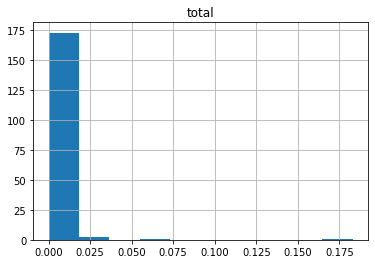

In [54]:
df1.hist(bins=10)